X.shape: (26, 2)


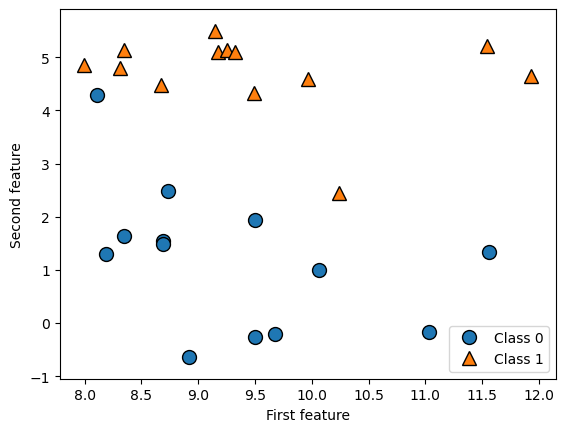

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn
"""
    一个模拟的二分类数据集示例是 forge 数据集，它有两个特征。
"""
# 生成数据集
X, y = mglearn.datasets.make_forge()
# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

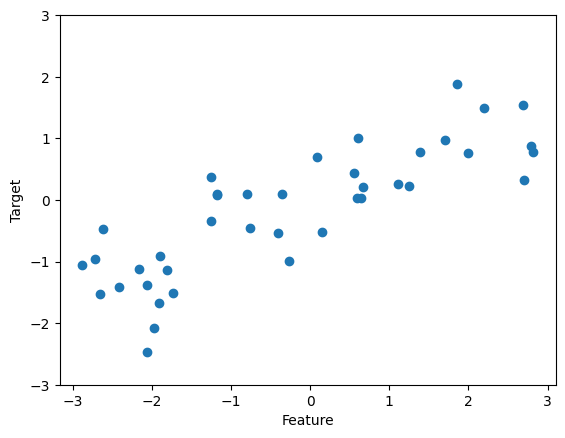

In [3]:
"""
    我们用模拟的 wave 数据集来说明回归算法。wave 数据集只有一个输入特征和一个连续的目标变量（或响应），后者是模型想要预测的对象。
"""
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
"""
    威斯康星州乳腺癌数据集（简称 cancer），里面记录了乳腺癌肿瘤的临床测量数据。每个肿瘤都被标记为“良性”（benign，表示无害肿瘤）或“恶性”（malignant，表示癌性肿瘤），其任务是基于人体组织的测量数据来学习预测肿瘤是否为恶性。
"""
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

# 这个数据集共包含 569 个数据点，每个数据点有 30 个特征：
print("Shape of cancer data: {}".format(cancer.data.shape))

# 在 569 个数据点中，212 个被标记为恶性，357 个被标记为良性：
print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

# 为了得到每个特征的语义说明，我们可以看一下 feature_names 属性：
print("Feature names:\n{}".format(cancer.feature_names))

"""
    还会用到一个现实世界中的回归数据集，即波士顿房价数据集。与这个数据集相关的任务是，利用犯罪率、是否邻近查尔斯河、公路可达性等信息，来预测 20 世纪 70 年代波士顿地区房屋价格的中位数。这个数据集包含 506 个数据点和 13 个特征：
"""
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

"""
    对于我们的目的而言，我们需要扩展这个数据集，输入特征不仅包括这 13 个测量结果，还包括这些特征之间的乘积（也叫交互项）。换句话说，我们不仅将犯罪率和公路可达性作为特征，还将犯罪率和公路可达性的乘积作为特征。像这样包含导出特征的方法叫作特征工程（feature engineering）
    最初的 13 个特征加上这 13 个特征两两组合（有放回）得到的 91 个特征，一共有 104 个特征。
"""
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))


cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
"""
    k近邻
    构建模型只需要保存训练数据集即可。想要对新数据点做出预测，算法会在训练数据集中找到最近的数据点，也就是它的“最近邻”。
"""
"""
     k近邻分类
     k-NN 算法最简单的版本只考虑一个最近邻，也就是与我们想要预测的数据点最近的训练数据点。
     预测结果就是这个训练数据点的已知输出。
     如下是这种分类方法在 forge数据集上的应用：
"""
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [ ]:
"""
   这里我们添加了 3 个新数据点（用五角星表示）。对于每个新数据点，我们标记了训练集中与它最近的点。
   单一最近邻算法的预测结果就是那个点的标签（对应五角星的颜色）。
   
   除了仅考虑最近邻，我还可以考虑任意个（k 个）邻居。这也是 k 近邻算法名字的来历。
   在考虑多于一个邻居的情况时，我们用“投票法”（voting）来指定标签。也就是说，对于每个测试点，我们数一数多少个邻居属于类别 0，多少个邻居属于类别 1。然后将出现次数更多的类别（也就是 k 个近邻中占多数的类别）作为预测结果。
"""
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
"""
   可以发现，左上角新数据点的预测结果与只用一个邻居时的预测结果不同。
   虽然这张图对应的是一个二分类问题，但方法同样适用于多分类的数据集。对于多分类问题，我们数一数每个类别分别有多少个邻居，然后将最常见的类别作为预测结果。
"""

In [ ]:
"""
    现在看一下如何通过 scikit-learn 来应用-=p k 近邻算法。
"""
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 导入类并将其实例化
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# 利用训练集对这个分类器进行拟合。
clf.fit(X_train, y_train)
# 调用 predict 方法来对测试数据进行预测。
print("Test set predictions: {}".format(clf.predict(X_test)))
# 为了评估模型的泛化能力好坏，我们可以对测试数据和测试标签调用 score 方法：
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
# 我们的模型精度约为 86%

In [ ]:
"""
    分析KNeighborsClassifier
    对于二维数据集，我们还可以在 xy 平面上画出所有可能的测试点的预测结果。
    我们根据平面中每个点所属的类别对平面进行着色。这样可以查看决策边界（decision boundary），
    即算法对类别 0 和类别 1 的分界线。
    下列代码分别将 1 个、3 个和 9 个邻居三种情况的决策边界可视化
"""
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
   # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
   clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
   mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
   mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
   ax.set_title("{} neighbor(s)".format(n_neighbors))
   ax.set_xlabel("feature 0")
   ax.set_ylabel("feature 1")
axes[0].legend(loc=3)